In [ ]:
import sys
import os
import time
import random
import threading 

https://docs.python.org/3/library/threading.html

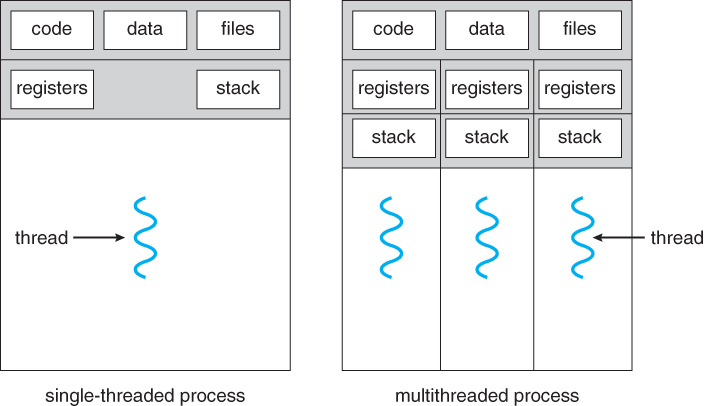

# Multiprocessing vs Threading:
* Use threading if your program is network bound or memory bound  
* Multiprocessing if it's CPU bound.

## Thread and Process: Differences

- A **process** is an instance of a running program. 
- **Process** may contain one or more **threads**, but a **thread** cannot contain a **process**.
- **Process** has a self-contained execution environment. It has its own memory space. 
- Application running on your computer may be a set of cooperating **processes**.
- **Process** don't share its memory, communication between **processes** implies data serialization.

- A **thread** is made of and exist within a **process**; every **process** has at least one **thread**. 
- Multiple **threads** in a **process** share resources, which helps in efficient communication between **threads**.
- **Threads** can be concurrent on a multi-core system, with every core executing the separate **threads** simultaneously.

### Advantages and Disadvantages

* Multithreading is more lightweight because most system and memory resources
are shared by the threads.

* In addition, the fact that multiple threads all access a shared pool of memory
is extremely convenient for numerical programming.

* On the other hand, multiprocessing is more flexible and can be distributed
across clusters.

* For the great majority of what we do in these lectures, multithreading will
suffice.

# Thread Examples

## Example 1: Basic Concepts

In [ ]:
def task():
  print('Starting a task...')
  print("ID of process running task: {}".format(os.getpid()))
  time.sleep(1)
  print('done')

In [ ]:
print("ID of process running main program: {}".format(os.getpid()))
start_time = time.perf_counter()
task()
task()
end_time = time.perf_counter()
print(f'It took {end_time- start_time: 0.2f} second(s) to complete.')

ID of process running main program: 66
Starting a task...
ID of process running task: 66
done
Starting a task...
ID of process running task: 66
done
It took  2.00 second(s) to complete.


In [ ]:
print("ID of process running main program: {}".format(os.getpid()))

start_time = time.perf_counter()

# create two new threads
t1 = threading.Thread(target=task)
t2 = threading.Thread(target=task)

# start the threads
t1.start()
t2.start()

# wait for the threads to complete
t1.join()
t2.join()

end_time = time.perf_counter()
print(f'It took {end_time - start_time: 0.2f} second(s) to complete.')

ID of process running main program: 66
Starting a task...
ID of process running task: 66
Starting a task...
ID of process running task: 66
done
done
It took  1.01 second(s) to complete.


## Example 2: Passing arguments to the thread

In [ ]:
def task_new(id):
  print('Starting the task {}, ID = {}...'.format(id, os.getpid()))
  time.sleep(1)
  print('task', id, 'done')

In [ ]:
start_time = time.perf_counter()

# create and start 10 threads
threads = []
for n in range(1, 11):
    t = threading.Thread(target=task_new, args=(n,))
    threads.append(t)
    t.start()

# wait for the threads to complete
for t in threads:
    t.join()

end_time = time.perf_counter()

print(f'It took {end_time- start_time: 0.2f} second(s) to complete.')

Starting the task 1, ID = 66...
Starting the task 2, ID = 66...
Starting the task 3, ID = 66...
Starting the task 4, ID = 66...
Starting the task 5, ID = 66...
Starting the task 6, ID = 66...
Starting the task 7, ID = 66...
Starting the task 8, ID = 66...
Starting the task 9, ID = 66...
Starting the task 10, ID = 66...
task 1 done
task 2 done
task 3 done
task 4 done
task 5 done
task 6 done
task 7 done
task 8 done
task task9 done
 10 done
It took  1.03 second(s) to complete.


## Example 3: Logging

Most programs do not use print to debug. The logging module supports embedding the thread name in every log message using the formatter code %(threadName)s. Including thread names in log messages makes it easier to trace those messages back to their source.

logging is also thread-safe, so messages from different threads are kept distinct in the output.


In [ ]:
import logging

logging.basicConfig(level=logging.DEBUG,
                    format='[%(levelname)s] (%(threadName)-10s) %(message)s',
                    )

def task_new(id):
  logging.debug('Starting the task {}, ID = {}...'.format(id, os.getpid()))
  time.sleep(1)
  logging.debug('task {} done'.format(id))

start_time = time.perf_counter()

# create and start 10 threads
threads = []
for n in range(1, 11):
    t = threading.Thread(target=task_new, args=(n,))
    threads.append(t)
    t.start()

# wait for the threads to complete
for t in threads:
    t.join()

end_time = time.perf_counter()

print(f'It took {end_time- start_time: 0.2f} second(s) to complete.')

[DEBUG] (Thread-107) Starting the task 1, ID = 66...
[DEBUG] (Thread-108) Starting the task 2, ID = 66...
[DEBUG] (Thread-109) Starting the task 3, ID = 66...
[DEBUG] (Thread-110) Starting the task 4, ID = 66...
[DEBUG] (Thread-111) Starting the task 5, ID = 66...
[DEBUG] (Thread-112) Starting the task 6, ID = 66...
[DEBUG] (Thread-113) Starting the task 7, ID = 66...
[DEBUG] (Thread-114) Starting the task 8, ID = 66...
[DEBUG] (Thread-115) Starting the task 9, ID = 66...
[DEBUG] (Thread-116) Starting the task 10, ID = 66...
[DEBUG] (Thread-107) task 1 done
[DEBUG] (Thread-108) task 2 done
[DEBUG] (Thread-109) task 3 done
[DEBUG] (Thread-110) task 4 done
[DEBUG] (Thread-111) task 5 done
[DEBUG] (Thread-112) task 6 done
[DEBUG] (Thread-113) task 7 done
[DEBUG] (Thread-114) task 8 done
[DEBUG] (Thread-115) task 9 done
[DEBUG] (Thread-116) task 10 done


It took  1.05 second(s) to complete.


## Example: Daemon vs. Non-Daemon Threads

Up to this point, the example programs have implicitly waited to exit until all threads have completed their work. Sometimes programs spawn a thread as a daemon that runs without blocking the main program from exiting. Using daemon threads is useful for services where there may not be an easy way to interrupt the thread or where letting the thread die in the middle of its work does not lose or corrupt data (for example, a thread that generates “heart beats” for a service monitoring tool). To mark a thread as a daemon, call its setDaemon() method with a boolean argument. The default is for threads to not be daemons, so passing True turns the daemon mode on.

In [ ]:
import threading
import time
import logging

logging.basicConfig(level=logging.DEBUG,
                    format='(%(threadName)-10s) %(message)s',
                    )

def daemon():
    logging.debug('Starting')
    time.sleep(2)
    logging.debug('Exiting')

d = threading.Thread(name='daemon', target=daemon)
d.setDaemon(True)

def non_daemon():
    logging.debug('Starting')
    logging.debug('Exiting')

t = threading.Thread(name='non-daemon', target=non_daemon)

d.start()
t.start()

[DEBUG] (daemon    ) Starting
[DEBUG] (non-daemon) Starting
[DEBUG] (non-daemon) Exiting


Notice that the output does not include the "Exiting" message from the daemon thread, since all of the non-daemon threads (including the main thread) exit before the daemon thread wakes up from its two second sleep.

To wait until a daemon thread has completed its work, use the join() method.

In [ ]:
import threading
import time
import logging

logging.basicConfig(level=logging.DEBUG,
                    format='(%(threadName)-10s) %(message)s',
                    )

def daemon():
    logging.debug('Starting')
    time.sleep(2)
    logging.debug('Exiting')

d = threading.Thread(name='daemon', target=daemon)
d.setDaemon(True)

def non_daemon():
    logging.debug('Starting')
    logging.debug('Exiting')

t = threading.Thread(name='non-daemon', target=non_daemon)

d.start()
t.start()

d.join()
t.join()

[DEBUG] (daemon    ) Starting
[DEBUG] (non-daemon) Starting
[DEBUG] (non-daemon) Exiting
[DEBUG] (daemon    ) Exiting
[DEBUG] (daemon    ) Exiting


# Asynchronous Processing

While many parallel applications can be described as maps, some can be more complex.
In this section we look at the asynchronous `concurrent.futures` interface,
which provides a simple API for ad-hoc parallelism.
This is useful for when your computations don't fit a regular pattern.

## Executor.submit

The `submit` method starts a computation in a separate thread or process and immediately gives us a `Future` object that refers to the result.  At first, the future is pending.  Once the function completes the future is finished. 

We collect the result of the task with the `.result()` method,
which does not return until the results are available.

In [ ]:
%%time
from time import sleep

def slowadd(a, b, delay=1):
    sleep(delay)
    return a + b

slowadd(1,1)

CPU times: user 9.84 ms, sys: 943 µs, total: 10.8 ms
Wall time: 1 s


In [ ]:
from concurrent.futures import ThreadPoolExecutor

with ThreadPoolExecutor(1) as e:
    future = e.submit(slowadd, 1, 2)
    print(future.result())


3


## Submit many tasks, receive many futures

Because submit returns immediately we can submit many tasks all at once and they will execute in parallel.

In [ ]:
%%time
results = [slowadd(i, i, delay=1) for i in range(8)]
print(results)

[0, 2, 4, 6, 8, 10, 12, 14]
CPU times: user 45.2 ms, sys: 8.13 ms, total: 53.3 ms
Wall time: 8.01 s


In [ ]:
%%time
e = ThreadPoolExecutor()
futures = [e.submit(slowadd, i, i, delay=1) for i in range(8)]
results = [f.result() for f in futures]
print(results)

[0, 2, 4, 6, 8, 10, 12, 14]
CPU times: user 12 ms, sys: 2.39 ms, total: 14.3 ms
Wall time: 1.01 s


*  Submit fires off a single function call in the background, returning a future.  
*  When we combine submit with a single for loop we recover the functionality of map.  
*  When we want to collect our results we replace each of our futures, `f`, with a call to `f.result()`
*  We can combine submit with multiple for loops and other general programming to get something more general than map.

# Race Condition

A race condition occurs when two or more threads can access shared data and they try to change it at the same time. As a result, the values of variables may be unpredictable and vary depending on the timings of context switches of the processes.

In [ ]:
# global variable x
x = 0
  
def increment():
    """
    function to increment global variable x
    """
    global x
    x += 1
  
def thread_task():
    """
    task for thread
    calls increment function 100000 times.
    """
    for _ in range(100000):
        increment()
  
def main_task():
    global x
    # setting global variable x as 0
    x = 0
  
    # creating threads
    t1 = threading.Thread(target=thread_task)
    t2 = threading.Thread(target=thread_task)
  
    # start threads
    t1.start()
    t2.start()
  
    # wait until threads finish their job
    t1.join()
    t2.join()
  
if __name__ == "__main__":
    for i in range(10):
        main_task()
        print("Iteration {0}: x = {1}".format(i,x))

Iteration 0: x = 200000
Iteration 1: x = 200000
Iteration 2: x = 200000
Iteration 3: x = 180806
Iteration 4: x = 140647
Iteration 5: x = 200000
Iteration 6: x = 149991
Iteration 7: x = 168866
Iteration 8: x = 170370
Iteration 9: x = 169333


We can use a lock to solve the issue of race condition.

In [ ]:
# global variable x
x = 0

def increment():
	"""
	function to increment global variable x
	"""
	global x
	x += 1

def thread_task(lock):
	"""
	task for thread
	calls increment function 100000 times.
	"""
	for _ in range(100000):
		lock.acquire() # thread execution is blocked until the lock is unlocked
		increment()
		lock.release() # If any other threads are blocked waiting for the lock to become unlocked, allow exactly one of them to proceed.

def main_task():
	global x
	# setting global variable x as 0
	x = 0

	# creating a lock
	lock = threading.Lock()

	# creating threads
	t1 = threading.Thread(target=thread_task, args=(lock,))
	t2 = threading.Thread(target=thread_task, args=(lock,))

	# start threads
	t1.start()
	t2.start()

	# wait until threads finish their job
	t1.join()
	t2.join()

if __name__ == "__main__":
	for i in range(10):
		main_task()
		print("Iteration {0}: x = {1}".format(i,x))


Iteration 0: x = 200000
Iteration 1: x = 200000
Iteration 2: x = 200000
Iteration 3: x = 200000
Iteration 4: x = 200000
Iteration 5: x = 200000
Iteration 6: x = 200000
Iteration 7: x = 200000
Iteration 8: x = 200000
Iteration 9: x = 200000


# Communicating Between Threads

The Queue module provides a FIFO implementation suitable for multi-threaded programming.

In [ ]:
from queue import Queue

q = Queue() # Default FIFO

for i in range(5):
  q.put(i)

while not q.empty():
  print(q.get())

0
1
2
3
4


In [ ]:
from queue import LifoQueue

q = LifoQueue() # stack: last-in, first-out

for i in range(5):
  q.put(i)

while not q.empty():
  print(q.get())

4
3
2
1
0


In [ ]:
from queue import Queue
from threading import Thread

# Object that signals shutdown
_sentinel = object()

# A thread that produces data
def producer(out_q):
	while running:
		# Produce some data
		# ...
		out_q.put(data)

	# Put the sentinel on the queue to indicate completion
	out_q.put(_sentinel)


# A thread that consumes data
def consumer(in_q):
	while True:
		# Get some data
		data = in_q.get()
		
		# Check for termination
		if data is _sentinel:
			in_q.put(_sentinel)
			break
		#...


Queue instances already have all of the required locking, so they can be safely shared by as many threads as per requirement. When using queues, it can be somewhat tricky to coordinate the shutdown of the producer and consumer.

In [ ]:
import threading, queue

q = queue.Queue()

def worker():
    while True:
        item = q.get()
        print(f'Working on {item}')
        print(f'Finished {item}')
        q.task_done()

# turn-on the worker thread
threading.Thread(target=worker, daemon=True).start()

# send thirty task requests to the worker
for item in range(30):
    q.put(item)
print('All task requests sent\n', end='')

# block until all tasks in the queue are done
q.join() 
print('All work completed')

All task requests sent
Working on 0
Finished 0
Working on 1
Finished 1
Working on 2
Finished 2
Working on 3
Finished 3
Working on 4
Finished 4
Working on 5
Finished 5
Working on 6
Finished 6
Working on 7
Finished 7
Working on 8
Finished 8
Working on 9
Finished 9
Working on 10
Finished 10
Working on 11
Finished 11
Working on 12
Finished 12
Working on 13
Finished 13
Working on 14
Finished 14
Working on 15
Finished 15
Working on 16
Finished 16
Working on 17
Finished 17
Working on 18
Finished 18
Working on 19
Finished 19
Working on 20
Finished 20
Working on 21
Finished 21
Working on 22
Finished 22
Working on 23
Finished 23
Working on 24
Finished 24
Working on 25
Finished 25
Working on 26
Finished 26
Working on 27
Finished 27
Working on 28
Finished 28
Working on 29
Finished 29
All work completed
